# Tokenization

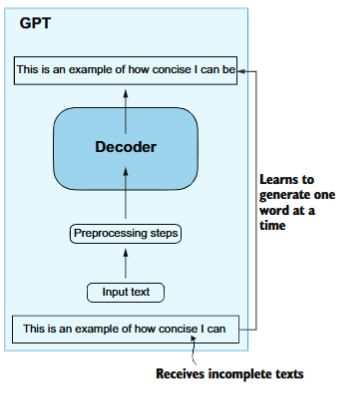

In the last chapter, we discovered that a Large Language Model (LLM) is, at its core, a master of language. Its superpower lies in a deceptively simple trick: predicting the next word in a sequence. Imagine you’re finishing someone’s sentence. They say, “This is an example of how concise I can…” and without much thought, you naturally add the word “be.” That’s exactly what GPT does—except it has practiced this guessing game billions and billions of times.

Take a look at the diagram above. GPT receives the partial sentence:
**“This is an example of how concise I can”**
and then, based on everything it has learned, it predicts the most likely continuation:
**“…be.”**

That one little word—be—is the model’s chosen answer. If we let it keep predicting word after word, eventually we get a complete passage: the kind of fluid responses you see every time you chat with ChatGPT.

But here’s the puzzle: if GPT’s job is simply to predict the next word, then how did it learn to do this in the first place? The answer might surprise you—it was trained in the very same way.

During training, the model is fed massive amounts of text: books, articles, conversations, code, and more. From this ocean of words, the model is repeatedly shown incomplete sentences and asked to guess the missing piece. For example:

Input: **“The sun rises in the ___”**

Expected output: **“east.”**

Input: **“Once upon a ___”**

Expected output: **“time.”**

Every time the model guesses wrong, it gets corrected. Over billions of rounds, it slowly learns patterns, grammar, facts, styles of writing, and even reasoning strategies—just from predicting the next word again and again.

So in short: GPT’s ability to “talk” isn’t magic. It’s the result of endless practice at this word-guessing game, until the game itself became second nature.

Think of it like a child learning to talk. At first, the child stumbles: they say “The sun rises in the west?” and an adult gently corrects them—“No, in the east.” Each mistake is like a little “loss score.” Over time, the child makes fewer mistakes, and eventually speaks fluently. GPT learned in almost the same way—only instead of parents correcting it, mountains of text and mathematical feedback (the loss function) did the job.

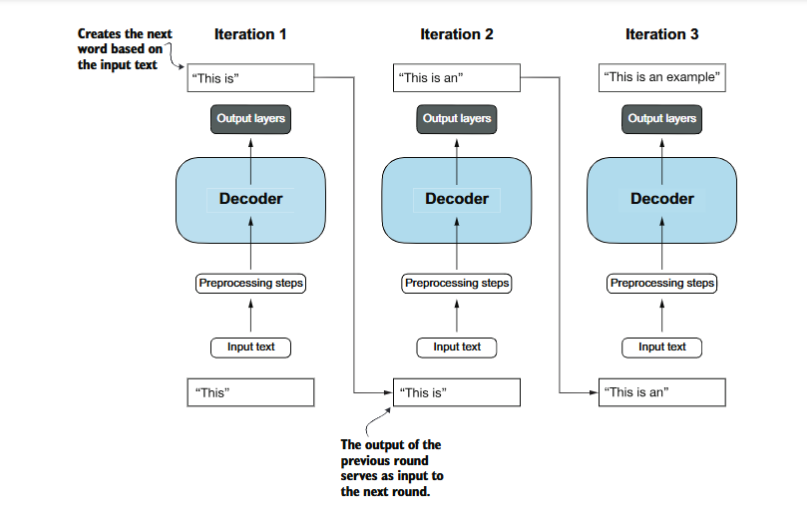

So far, we’ve learned that words are the key players in this whole process. But here’s the catch: machines don’t actually understand words. To them, “sun,” “moon,” or “hello” are nothing but strange squiggles. What machines truly understand are numbers.

So how do we bridge this gap between language and numbers? The trick is simple—we need to convert every word into a number. Imagine giving each unique word in a language its own ID card. “Apple” might get the number 17, “banana” might be 42, and “orange” might be 128. Once every word has a number, the machine can finally start processing them.

This process of breaking down text and assigning numbers is called Tokenization. Think of it as turning a story into a secret code of numbers that only the machine can read.

Now, let’s take a look at a figure that shows how this magic works.

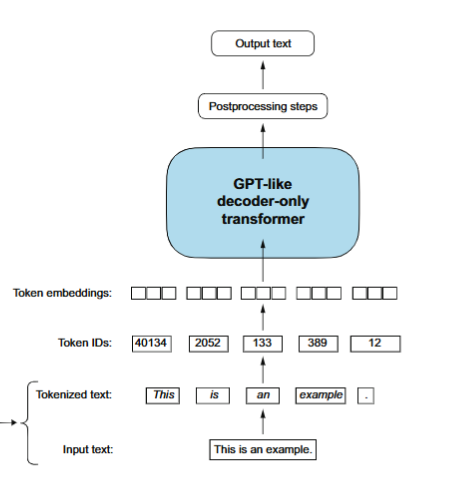

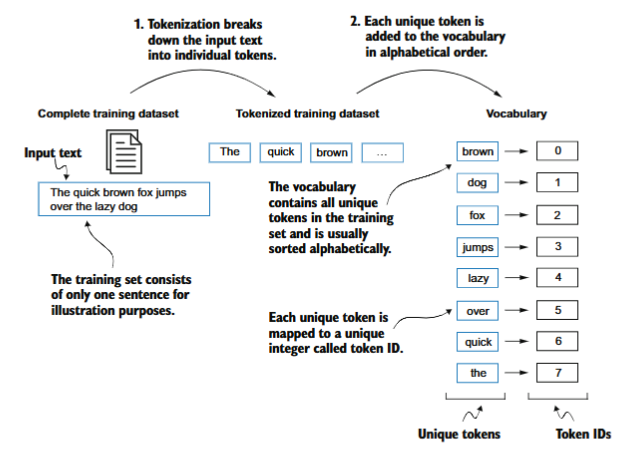

## Understanding Byte Pair Encoding (BPE)

But plain tokenization (one word → one ID) has **two big problems**:

1. **Unknown words**: If a word never appeared in training (or is misspelled),  
   the model cannot recognize it at all.  

2. **No relationships**: Words like *"boy"* and *"boys"* are treated as  
   completely different tokens, even though they’re closely related.

---

### The Hero: Byte Pair Encoding (BPE)

BPE fixes this by breaking words into **subwords** instead of treating each  
whole word separately.

Example:

- With simple tokenization:  
  - "boy" → [87]  
  - "boys" → [102]  
  (no relationship at all)

- With BPE:  
  - "boy" → ["boy"]  
  - "boys" → ["boy", "s"]

Now the model knows that *"boys"* is just *"boy"* + *"s"*. Even unseen words  
like *"boyish"* → ["boy", "ish"] still make sense to the model.

Think of it like LEGO bricks: instead of memorizing every full toy,  
BPE learns smaller building blocks, and uses them to assemble new toys.


## How BPE Works (Step by Step)

Let’s walk through a tiny example using the words:  
`low, lower, lowest`

---

#### Step 1: Start small (characters)
We break every word into characters + end-of-word marker:
- `low` → `l o w </w>`
- `lower` → `l o w e r </w>`
- `lowest` → `l o w e s t </w>`

---

#### Step 2: Count pairs
Look at all adjacent pairs and count frequency:  
- (l,o) = 3  
- (o,w) = 3  
- (w,e) = 2  
- others = 1  

---

#### Step 3: Merge most frequent pair
Merge (l,o) → `lo`:

- `low` → `lo w </w>`  
- `lower` → `lo w e r </w>`  
- `lowest` → `lo w e s t </w>`

---

#### Step 4: Repeat
Now (lo,w) is frequent → merge into `low`:

- `low` → `low </w>`  
- `lower` → `low e r </w>`  
- `lowest` → `low e s t </w>`

After more merges, we might get tokens like `low`, `er`, `est`.

---

#### Step 5: Assign IDs
Finally, each token is added to the vocabulary and gets a unique number.  
Example:  
- "low" → 42  
- "er" → 57  
- "est" → 81

This is the token mapping used by the model.


## Why BPE is Useful

- **No unknown words**: new words get split into familiar subpieces.  
- **Reuses meaning**: related words share subword parts (`boy` + `s`).  
- **Efficient vocab**: instead of billions of whole words, we only need tens of thousands of subwords.

---

#### Shortcomings
- Splits can sometimes look weird (not linguistically clean).  
- Rare words → many subwords → longer sequences.  
- It’s purely frequency-based, not meaning-based.  

Still, BPE is one of the most powerful and widely used tokenization methods in modern LLMs.


##  BPE in GPT Models

In the previous sections, we implemented a simple tokenization scheme for illustration.  
Now, we’ll look at a **more sophisticated tokenization scheme** based on **Byte Pair Encoding (BPE)**, which was used to train LLMs such as GPT-2, GPT-3, and the original model behind ChatGPT.

---

> **Note**  
> Since implementing BPE from scratch can be complicated, we’ll use an **existing Python library called `tiktoken`**, which implements BPE efficiently using Rust.  
> [GitHub: tiktoken](https://github.com/openai/tiktoken)


In [ ]:
# Install tiktoken
!pip3 install tiktoken

In [ ]:
# Check the version of tiktoken
import importlib
import tiktoken

print("tiktoken version:", importlib.metadata.version("tiktoken"))

tiktoken version: 0.11.0


In [ ]:
# Initialize BPE encodings for GPT-2, GPT-3, GPT-4
encodings = {
    "gpt2": tiktoken.get_encoding("gpt2"),
    "gpt3": tiktoken.get_encoding("p50k_base"),  # commonly associated with GPT-3
    "gpt4": tiktoken.get_encoding("cl100k_base") # GPT-4 and later
}

# Get vocabulary sizes
vocab_sizes = {model: encoding.n_vocab for model, encoding in encodings.items()}

# Print vocabulary sizes
for model, size in vocab_sizes.items():
    print(f"The vocabulary size for {model.upper()} is: {size}")

The vocabulary size for GPT2 is: 50257
The vocabulary size for GPT3 is: 50281
The vocabulary size for GPT4 is: 100277


> **Observation**  
> GPT-2 uses a BPE tokenizer with a vocabulary size of 50,257.  
> Special tokens like `<|endoftext|>` are assigned the largest token ID (50256).


In [ ]:
# Select GPT-2 tokenizer
tokenizer = tiktoken.get_encoding("gpt2")

text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someunknownPlace."
)

# Encode text to token IDs
integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)


[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 34680, 27271, 13]


> The code above prints token IDs for each token in the text.  
> The special token `<|endoftext|>` gets a large ID, as expected.


In [ ]:
# Decode token IDs back to text
strings = tokenizer.decode(integers)
print(strings)


Hello, do you like tea? <|endoftext|> In the sunlit terracesof someunknownPlace.


> **Observation 1**  
> The BPE tokenizer can **encode and decode unknown words** like `"someunknownPlace"` correctly.  

> **Observation 2**  
> It does this **without `<|unk|>` tokens**, because BPE breaks unknown words into smaller subword units or characters.  

In short, BPE allows the tokenizer to handle **out-of-vocabulary words** reliably.


In [ ]:
# Another example with completely unknown tokens
integers = tokenizer.encode("Akwirw ier")
print("Token IDs:", integers)

strings = tokenizer.decode(integers)
print("Decoded text:", strings)


Token IDs: [33901, 86, 343, 86, 220, 959]
Decoded text: Akwirw ier


> **Takeaway**  
> Even completely new or misspelled words can be tokenized into meaningful subwords or characters.  
> Thanks to BPE, GPT models can understand and process new words without ever having seen them in training.

In [ ]:
import torch
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
def text_to_token_ids(text, tokenizer):
    encoded = tokenizer.encode(text, allowed_special={'<|endoftext|>'})
    encoded_tensor = torch.tensor(encoded).unsqueeze(0) # add batch dimension
    return encoded_tensor

def token_ids_to_text(token_ids, tokenizer):
    flat = token_ids.squeeze(0) # remove batch dimension
    return tokenizer.decode(flat.tolist())

In [ ]:
start_context = "Every effort moves you"
token_ids = text_to_token_ids(start_context, tokenizer)
print(token_ids)

text = token_ids_to_text(token_ids, tokenizer)
print(text)

tensor([[6109, 3626, 6100,  345]])
Every effort moves you


# Token Embeddings


Ok, the **tokenization chapter** is closed for now.  
We’ve successfully converted words into numbers (token IDs), but here’s a crucial point:

> Does the number itself represent the **meaning** of the word?  

The answer is **no**. A token ID like `42` or `87` is just an integer — it’s arbitrary. It tells the model *which word it is*, but not *what the word means*.  

To capture **semantic meaning**, we use **word embeddings**.  

---

### What is a Word Embedding?

Think of embeddings as points in a **high-dimensional space** (a hyperplane).  
Each word gets mapped to a vector of numbers (its coordinates).  

- Nearby points in this space have **similar meanings**.  
- The exact dimensions are not human-interpretable — they could encode abstract concepts like *royalty*, *manliness*, *positivity*, or anything else learned by the model.  
- The key idea: **semantically similar words are close together**, while unrelated words are far apart.  

---

### Example in 3 Dimensions

Let’s take a tiny example sentence:  

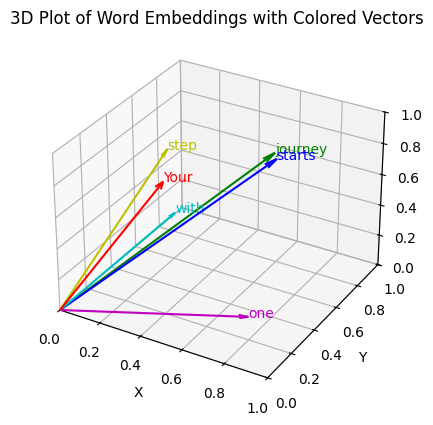

In [13]:
import torch
import matplotlib.pyplot as plt

# Embedding vectors for each word (3-dimensional for visualization)
inputs = torch.tensor([
  [0.43, 0.15, 0.89], # "Your"
  [0.55, 0.87, 0.66], # "journey"
  [0.57, 0.85, 0.64], # "starts"
  [0.22, 0.58, 0.33], # "with"
  [0.77, 0.25, 0.10], # "one"
  [0.05, 0.80, 0.55]  # "step"
])

words = ["Your", "journey", "starts", "with", "one", "step"]

# Extract coordinates
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Colors for vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Draw vectors from origin to each embedding
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set axes labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


#### How Are Embeddings Learned?

You might be wondering:

> “How do we actually get the embedding values for words? Where do these numbers come from?”

Here’s the answer:  

1. **Random Initialization**  
   At the very beginning of training, each token (the integers we got from BPE) is assigned a random vector.  
   - Think of it like giving each word a random starting point in a high-dimensional space.  
   - For example, the token ID for `"king"` might initially be `[0.023, 0.872, 0.441, ...]` — random numbers in a 768-dimensional space (for GPT-2 small).

2. **Trainable Vectors**  
   These vectors are **not fixed**. They are trainable weights in the model.  
   - During training, the model sees context: sequences of words and the next-word prediction task.  
   - Based on the loss (how far its prediction was from the true next word), **gradients are calculated** for all parameters, including the embedding vectors.  
   - The optimizer updates the embeddings so that similar words (in context) move closer in the embedding space.  

3. **Learning Semantic Meaning**  
   After enough training steps, embeddings encode **meaningful relationships**.  
   - Words that appear in similar contexts end up **close together**.  
   - Words that rarely appear together are **far apart**.  

---

#### Structure of GPT-2 Embeddings

Let’s take **GPT-2 (124M)** as an example:

- **Vocabulary size:** ~50,257 tokens (from BPE)  
- **Embedding dimension:** 768  

This means the embedding layer is essentially a **matrix** of size:




- Each **row** corresponds to a token ID.  
- Each **column** corresponds to one of the 768 features of the embedding vector.  

For example:

| Token ID | Feature 1 | Feature 2 | Feature 3 | ... | Feature 768 |
|----------|-----------|-----------|-----------|-----|--------------|
| 0        | 0.023     | 0.872     | 0.441     | ... | 0.555        |
| 1        | 0.112     | 0.634     | 0.221     | ... | 0.129        |
| 2        | 0.998     | 0.102     | 0.876     | ... | 0.431        |
| ...      | ...       | ...       | ...       | ... | ...          |
| 50256    | 0.445     | 0.771     | 0.338     | ... | 0.912        |

- When we feed a token ID into the model, it **selects the corresponding row** from this embedding matrix.  
- That vector is then used as the **input to the next layers** of the transformer.  

---

### 📝 Intuition

Think of the embedding matrix like a **giant dictionary of vectors**:  

- Each word has its own vector.  
- Initially, the entries are random.  
- Training slowly adjusts all vectors so that the **geometry of the space captures semantic relationships**.  
- After training, operations like `king - man + woman ≈ queen` become possible because the embeddings encode meaning.  

---

> In short:  
> The embeddings start as random points. Training moves them into a **meaningful high-dimensional space** where words that “belong together” are close, and words that don’t are far apart.  
> For GPT-2 small, this is a **50,257 × 768 matrix**, with each row representing a token vector that the model learns over time.


In [15]:
# Let's imagin inputs ids are token ids
input_ids = torch.tensor([2, 3, 5, 1])
vocab_size = 50256
embedding_size = 768

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, embedding_size)

In [18]:
# You can get the size of the embedding layer (vocabulary size) using the num_embeddings attribute.
print(embedding_layer.num_embeddings)

# You can also get the embedding dimension using the embedding_dim attribute.
print(embedding_layer.embedding_dim)

50256
768


In [22]:
# By feeding the index we can get the row. we can imagine it as a lookup function
embedding_layer(torch.tensor([2]))

tensor([[ 7.9574e-01,  5.3501e-01,  9.4275e-01,  6.5065e-01,  1.1889e+00,
         -4.8257e-03,  7.1566e-01, -1.1246e+00, -1.3184e+00, -5.3219e-01,
          4.1248e-01,  6.3980e-02, -1.1208e+00,  6.8043e-01,  1.6497e-01,
          2.7160e-01,  7.2243e-02,  9.3483e-01, -1.3749e+00,  1.8703e-02,
         -4.4696e-01, -1.3235e+00, -1.8812e+00, -1.6174e+00,  1.9986e+00,
          5.2101e-01, -1.6493e-02, -1.6314e-01,  2.1571e+00, -1.3058e+00,
          4.7589e-01,  4.8626e-01, -1.0152e+00,  1.5725e+00, -1.3622e+00,
          1.2048e+00,  1.2811e+00, -1.3369e+00, -8.2287e-01, -8.9714e-01,
         -9.7596e-01,  1.2375e+00, -2.8280e-03,  2.8986e-01,  3.1343e-01,
         -7.5936e-02, -3.8433e-01, -6.0453e-01, -8.4243e-01, -5.3815e-02,
          5.7209e-01, -1.1483e+00,  4.5340e-01,  7.9285e-01, -1.4560e+00,
          1.1582e+00,  2.1957e-01, -1.0840e+00, -9.2130e-01,  4.5243e-02,
          4.2861e-01,  1.1181e+00,  8.9419e-02,  3.2056e-01,  5.0872e-01,
          4.8065e-01,  7.7648e-01,  1.

In [23]:
# So, we can lookup for the token ids we got from BPE
embedding_layer(input_ids)

tensor([[ 0.7957,  0.5350,  0.9427,  ..., -1.0749,  0.0955, -1.4138],
        [-0.0312,  1.6913, -2.2380,  ...,  0.2379, -1.1839, -0.3179],
        [-0.4334, -0.5095, -0.7118,  ...,  0.8329,  0.2992,  0.2496],
        [ 0.2579,  0.3420, -0.8168,  ..., -0.4098,  0.4978, -0.3721]],
       grad_fn=<EmbeddingBackward0>)

So far, we’ve talked about **token embeddings**, which give each word a vector representing its meaning.  

But here’s an important question:

> “How does the model know the order of words?”  

For example, the sentences:

- The cat chased the dog.

- The dog chased the cat.


- Same words.  
- Different meanings because the **order of words changed**.  

If the model only used token embeddings, it would see these sentences as **sets of words**, ignoring the order. That would be a problem!  

---

##### The Solution: Positional Embeddings

Transformers (like GPT) don’t have recurrence or convolution to naturally handle order.  
Instead, they **add another vector to each token embedding** called the **positional embedding**, which encodes the word’s position in the sequence.  

- If a sentence has `N` tokens, the model has a **learnable positional embedding for each position** from 0 to N-1.  
- These vectors are **added to the token embeddings** before passing them into the transformer layers.  

Mathematically:
- Input to transformer layer = TokenEmbedding(word) + PositionalEmbedding(position)

---

##### Example

Suppose we have the sentence:

- Tokens: `[Your, journey, starts, with, one, step]` → `[x1, x2, x3, x4, x5, x6]`  
- Positions: `[0, 1, 2, 3, 4, 5]` → `[p0, p1, p2, p3, p4, p5]`  

The **input to the next part of architecture** is:

x1 + p0, x2 + p1, x3 + p2, x4 + p3, x5 + p4, x6 + p5

- This lets the model know **both the meaning of the word and where it appears in the sentence**.  

---

##### Intuition

Think of positional embeddings like **GPS coordinates** for each word:

- Token embeddings tell the model **what the word is**.  
- Positional embeddings tell the model **where the word is**.  

Together, they allow the transformer to understand:

- Word order  
- Sentence structure  
- Relationships between words in context  

---

##### Key Points

1. Positional embeddings are **learnable vectors** (like token embeddings) in GPT.  
2. They have the same **dimension as the token embeddings** (e.g., 768 for GPT-2 small).  
3. Added to token embeddings **before the transformer layers**.  
4. Enable the model to understand **sequence information**, which is critical for generating coherent text.



In [26]:
import torch

# Suppose we have a sequence of token IDs (like from BPE)
input_ids = torch.tensor([2, 3, 5, 1, 6])  # Example token IDs
vocab_size = 50256
embedding_size = 768
sequence_length = len(input_ids) # Normally this sequence length is fixed.

# --- Token Embedding Layer ---
torch.manual_seed(123)
token_embedding = torch.nn.Embedding(vocab_size, embedding_size)

print("Token Embedding Layer:")
print("Vocabulary size:", token_embedding.num_embeddings)
print("Embedding dimension:", token_embedding.embedding_dim)

# Look up embeddings for the entire sequence
print("\nToken embeddings for the input sequence:")
tokens_embedded = token_embedding(input_ids)
print(tokens_embedded)
print("Shape:", tokens_embedded.shape)  # Should be (sequence_length, embedding_size)


# --- Positional Embedding Layer ---
# In GPT, positional embeddings have the same dimension as token embeddings
torch.manual_seed(1234)
positional_embedding = torch.nn.Embedding(sequence_length, embedding_size)

print("\nPositional Embedding Layer:")
print("Sequence length:", positional_embedding.num_embeddings)
print("Embedding dimension:", positional_embedding.embedding_dim)

# Generate positions (0, 1, 2, ..., sequence_length-1)
positions = torch.arange(sequence_length)

# Look up positional embeddings
positions_embedded = positional_embedding(positions)
print("\nPositional embeddings for positions 0..3:")
print(positions_embedded)
print("Shape:", positions_embedded.shape)  # (sequence_length, embedding_size)


# --- Combine Token + Positional Embeddings ---
input_with_position = tokens_embedded + positions_embedded
print("\nCombined token + positional embeddings shape:", input_with_position.shape)


Token Embedding Layer:
Vocabulary size: 50256
Embedding dimension: 768

Token embeddings for the input sequence:
tensor([[ 0.7957,  0.5350,  0.9427,  ..., -1.0749,  0.0955, -1.4138],
        [-0.0312,  1.6913, -2.2380,  ...,  0.2379, -1.1839, -0.3179],
        [-0.4334, -0.5095, -0.7118,  ...,  0.8329,  0.2992,  0.2496],
        [ 0.2579,  0.3420, -0.8168,  ..., -0.4098,  0.4978, -0.3721],
        [-1.4580, -0.4094, -0.5215,  ..., -0.2644, -1.1221,  1.0535]],
       grad_fn=<EmbeddingBackward0>)
Shape: torch.Size([5, 768])

Positional Embedding Layer:
Sequence length: 5
Embedding dimension: 768

Positional embeddings for positions 0..3:
tensor([[-0.1117, -0.4966,  0.1631,  ...,  0.8378, -0.3407,  0.2583],
        [-0.3120,  2.4534,  0.7926,  ..., -1.0925, -0.7953,  2.1657],
        [-1.1647, -0.3017,  0.6523,  ..., -0.7119, -1.4216,  1.0757],
        [-0.6441, -2.3163,  1.3993,  ...,  1.6162, -2.2187, -2.2874],
        [ 1.4861, -0.3601,  0.8439,  ..., -1.5696,  0.7493, -0.3264]],
    

# Preparing all things together
 ## From input text, to Decoder. All the preprocessing steps of the data combining tokenizer, token_embedding = word_embedding + positional_embedding, Creating input-output pair (as it is important for both training, and inference)

In [27]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print("Total number of character:", len(raw_text))
print(raw_text[:99])

Total number of character: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [28]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")

In [30]:
# Executing this code above will return 5145, the total number of tokens in the training set, after applying the BPE tokenizer.
enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145



One of the easiest and most intuitive ways to create the input-target pairs for the nextword prediction task is to create two variables, x and y, where x contains the input tokens
and y contains the targets, which are the inputs shifted by 1

The context size determines how many tokens are included in the input




In [32]:
context_size = 4 #length of the input
#The context_size of 4 means that the model is trained to look at a sequence of 4 words (or tokens)
#to predict the next word in the sequence.
#The input x is the first 4 tokens [1, 2, 3, 4], and the target y is the next 4 tokens [2, 3, 4, 5]

x = enc_text[:context_size]
y = enc_text[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [40, 367, 2885, 1464]
y:      [367, 2885, 1464, 1807]


Both in inference, and training: under the context size the input and prediction will look like below. Imagining context_size = 4

In [34]:
for i in range(1, context_size+1):
    context = enc_text[:i]
    desired = enc_text[i]

    print(context, "---->", desired)

[40] ----> 367
[40, 367] ----> 2885
[40, 367, 2885] ----> 1464
[40, 367, 2885, 1464] ----> 1807


In [35]:
for i in range(1, context_size+1):
    context = enc_text[:i]
    desired = enc_text[i]

    print(tokenizer.decode(context), "---->", tokenizer.decode([desired]))

I ---->  H
I H ----> AD
I HAD ---->  always
I HAD always ---->  thought


#### Implementing Dataset and DataLoader

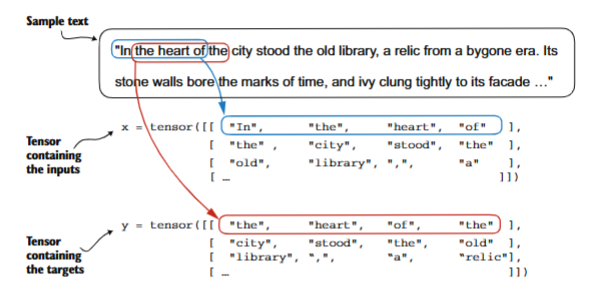

Now that we understand **tokenization** and **embeddings**, it’s time to prepare our data for training GPT.  

GPT models are trained to **predict the next token** in a sequence.  
To do this efficiently, we need:

1. A **Dataset**: Breaks the text into sequences of tokens.  
2. A **DataLoader**: Feeds batches of sequences to the model during training.  

We’ll implement both step by step.

**Step 1: Creating a Custom Dataset**

We want a Dataset that:

- Takes the raw text.

- Converts it to token IDs using our GPT-2 BPE tokenizer.

- Breaks the text into overlapping sequences of a fixed length (context_size).

- Returns input tokens and target tokens (next-token prediction).

In [57]:
from torch.utils.data import Dataset, DataLoader
import tiktoken
import torch


class GPTDataSet(Dataset):
  def __init__(self, txt, tokenizer, context_size, stride):
    self.input_ids = []
    self.target_ids = []
    # Tokenize the entire text
    token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})
    # Use a sliding window to chunk the book into overlapping sequences of max_length
    for i in range(0, len(token_ids) - context_size, stride):
        input_chunk = token_ids[i:i + context_size]
        target_chunk = token_ids[i + 1: i + context_size + 1]
        self.input_ids.append(torch.tensor(input_chunk))
        self.target_ids.append(torch.tensor(target_chunk))

  def __len__(self):
      return len(self.input_ids)

  def __getitem__(self, idx):
      return self.input_ids[idx], self.target_ids[idx]

**Step 2: Creating a DataLoader**

The DataLoader helps us:

*   Feed the model batches of sequences.
*   Shuffle the data (for better training).


Drop incomplete batches if needed.

We wrap everything in a helper function:

In [58]:
def create_dataloader_v1(txt, batch_size=4, context_size=1024,
                         stride=1024, shuffle=True, drop_last=True,
                         num_workers=0):

    # Initialize the tokenizer
    tokenizer = tiktoken.get_encoding("gpt2")

    # Create dataset
    dataset = GPTDataSet(txt, tokenizer, context_size, stride)

    # Create dataloader
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [71]:
dataloader = create_dataloader_v1(txt=raw_text, batch_size=4, context_size=128,
                         stride=128)
print(len(dataloader))
data_iter = iter(dataloader)
first_batch = next(data_iter)
print("Shape of first input batch:", first_batch[0].shape)
print("Shape of first target batch:", first_batch[1].shape)

10
Shape of first input batch: torch.Size([4, 128])
Shape of first target batch: torch.Size([4, 128])


In [74]:
# if we want to pass the embedding to the decoder of GPT architecture we can simply lookup for the embedding we have
import torch

word_embedding = torch.nn.Embedding(num_embeddings=50257, embedding_dim=768)
positional_embedding = torch.nn.Embedding(num_embeddings=128, embedding_dim=768)

w_embedding = word_embedding(first_batch[0])
pos_embedding = positional_embedding(torch.arange(128))
pos_embedding = pos_embedding.unsqueeze(0).expand(4, -1, -1)
print(w_embedding.shape)
print(pos_embedding.shape)

token_embedding = w_embedding + pos_embedding
print(token_embedding.shape)

torch.Size([4, 128, 768])
torch.Size([4, 128, 768])
torch.Size([4, 128, 768])


In [69]:
txt = ("Evey step moves you")

dataloader = create_dataloader_v1(txt=txt, batch_size=1, context_size=2,
                         stride=2)
data_iter = iter(dataloader)
first_batch = next(data_iter)
print("Shape of input batch:", first_batch[0].shape)
print("Shape of target batch:", first_batch[1].shape)

Shape of input batch: torch.Size([1, 2])
Shape of target batch: torch.Size([1, 2])


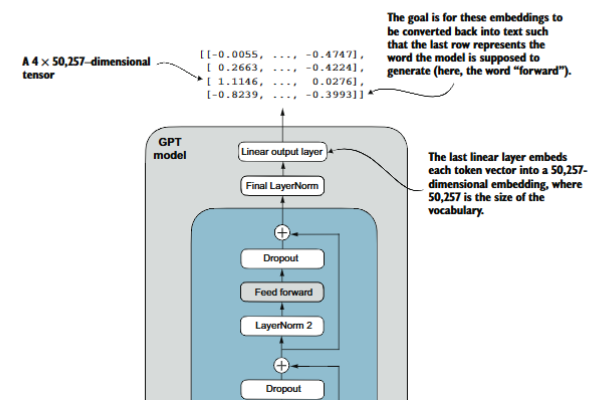
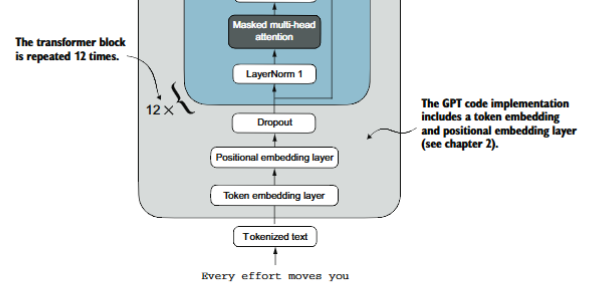